<script>
  jQuery(document).ready(function($) {  
  
  $(window).on('load', function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });
  
  });
</script>

<style type="text/css">
  div#preloader { position: fixed; 
      left: 0; 
      top: 0; 
      z-index: 999; 
      width: 100%; 
      height: 100%; 
      overflow: visible; 
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
  }

</style>

<div id="preloader">

</div>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton1').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton1').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton1" value="Show Code"></form>

<script>
  function result_toggle() {
    if (result_shown){
      $('div.output').hide('500');
      $('#toggleButton2').val('Show Results')
    } else {
      $('div.output').show('500');
      $('#toggleButton2').val('Hide Results')
    }
    result_shown = !result_shown
  }

  $( document ).ready(function(){
    result_shown=false;
    $('div.output').hide()
  });
</script>
<form action="javascript:result_toggle()"><input type="submit" id="toggleButton2" value="Show Results"></form>

# DIN-5034-2-Algorithmus

Berechne mithilfe von

In [53]:
%display latex

In [54]:
Grad=pi/180
var('TagDesJahres')
ZahlDerTageImJahr=365
J = 360 * Grad * TagDesJahres / ZahlDerTageImJahr;

die **Sonnendeklination**

In [55]:
delta = (0.3948 
         - 23.2559 * cos(J + 9.1 * Grad)
         - 0.3915 * cos(2 * J + 5.4 * Grad)
         - 0.1764 * cos(3 * J + 26. * Grad)
        ) * Grad;

An diesen Gleichungen wird bereits deutlich, dass der Algorithmus nur ungefähre Ergebnisse liefern kann, da das Konzept der Schaltjahre und Schaltsekunden nicht berücksichtigt wird.

Bestimme die sogenannte **Zeitgleichung**

In [56]:
var('Stunden')
Minuten = Stunden / 60
Zgl = (0.0066 
       + 7.3525 * cos(J + 85.9 * Grad)
       + 9.9359 * cos(2 * J + 108.9 * Grad)
       + 0.3387 * cos(3 * J + 105.2 * Grad)
      ) * Minuten;

und aus der **lokalen Zeit LZ** und der **Zeitzone ZZ** (z.B. MEZ = UTC+1 oder MESZ = UTC+2) oder direkt aus der **Weltzeit (UTC)** in Abhängigkeit der **geographischen Länge $\lambda$** die **mittlere Ortszeit MOZ**

In [57]:
var('LZ')
var('Zeitzone')
var('Laengengrad')
UTC = LZ - Zeitzone
MOZ = UTC - 4 * (0 * 15 * Grad - Laengengrad) * Minuten / Grad;

und damit die **wahre Ortszeit WOZ**, welche die Schwankungen der Erdrotation berücksichtigt,

In [58]:
WOZ = MOZ + Zgl;

Durch die **geographische Breite $\varphi$** und den **Stundenwinkel**

In [59]:
Stundenwinkel = (12 * Stunden - WOZ) * 15 * Grad / Stunden;

lassen sich **Sonnenhöhe** und -**azimut** berechnen

In [60]:
var('Breitengrad')
Sonnenhoehe = arcsin(
    cos(Stundenwinkel) * cos(Breitengrad) * cos(delta)
    + sin(Breitengrad) * sin(delta)
    );
Sonnenazimut = (180 * Grad 
    + sign(WOZ / Stunden - 12)
    * arccos(
        (sin(Sonnenhoehe) * sin(Breitengrad) - sin(delta))
        / (cos(Sonnenhoehe) * cos(Breitengrad))
        )
    );

## Heutiger Sonnenweg und jetziger Sonnestand

Bestimme den heutigen Sonnenweg am DBI-TZ! Ein Vergleich kann mit dem Online-Angebot von [Sonnenverlauf.de](https://www.sonnenverlauf.de/#/50.93,13.35,17/2017.09.22/15:10/1/0) vorgenommen werden.

Dafür wird zunächst die **lokale Zeit** bestimmt.

In [61]:
# Zeit
import datetime as dt

# Zeitzone ZZ
MEZ = + 1 * Stunden
MESZ = + 2 * Stunden
ZZ = MEZ

# Jetzt
Jetzt = dt.datetime.utcnow() + dt.timedelta(hours = int(ZZ / Stunden));
#Jetzt = dt.datetime(2017,10,24,9,30)

# LokaleZeit LZ
LokaleZeit = (Jetzt.hour + Jetzt.minute / 60) * Stunden;
print 'Seit Beginn des Tages sind {:.1f} Stunden vergangen.'.format(float(LokaleZeit/Stunden))

Seit Beginn des Tages sind 22.4 Stunden vergangen.


Dann brauchen wir die Information, welchen **Tag des Jahres** wir heute haben.

In [62]:
Heute = (Jetzt.date() - dt.date(Jetzt.year,1,1)).days + 1;
print 'Heute haben wir den {}. Tag des Jahres.'.format(Heute)

Heute haben wir den 298. Tag des Jahres.


In [63]:
print 'Die Erde hat seit Begin des Jahres {:.1f} Grad auf der Sonnenumlaufbahn zurückgelegt.'.format(
    float(J(TagDesJahres = Heute) / Grad))
print 'Die Abweichung des Sonnenstandes ist heute etwa {:.1f} Grad.'.format(float(delta(TagDesJahres = Heute) / Grad))

Die Erde hat seit Begin des Jahres 293.9 Grad auf der Sonnenumlaufbahn zurückgelegt.
Die Abweichung des Sonnenstandes ist heute etwa -11.9 Grad.


Über das Jahr gesehen hat die **Abweichung** folgenden Verlauf.

In [64]:
Deltadiagram = plot(delta.function(TagDesJahres) / Grad, 0, 365)
Deltadiagram.axes_labels(['Tag des\n Jahres',u'Sonnendeklination\n in °'])

In [65]:
print 'Die Sonnenzeit weicht heute {:.1f} Minuten von der lokalen Zeit ab.'.format(float(Zgl(TagDesJahres = Heute) / Minuten))

Die Sonnenzeit weicht heute 16.0 Minuten von der lokalen Zeit ab.


Über das Jahr gesehen hat die **Zeitgleichung** folgenden Verlauf.

In [66]:
Zgldiagramm = plot(Zgl.function(TagDesJahres) / Minuten, 0, 365)
Zgldiagramm.axes_labels(['Tag des\n Jahres','Abweichung von der\n Sonnenzeit in Minuten'])

Für die Berechnung der anderen Gleichungen ist der **geographische Standort** entscheidend. Dafür werden der **Längengrad $l$** und der **Breitengrad $b$** des DBI-TZ verwendet.

In [67]:
# Längengrad
l = 13.35 * Grad;
# Breitengrad
b = 50.93 * Grad;

An diesem Ort (Längengrad und Zeitzone) ist die **mittlere Ortszeit** nur von der lokalen Zeit abhängig:

In [68]:
print 'MOZ'+str(MOZ.arguments())
MOZ.subs({
    Laengengrad:l
    ,Zeitzone:ZZ
}).expand()

MOZ(LZ, Laengengrad, Stunden, Zeitzone)


LZ - 0.110000000000000*Stunden

Um den etwas komplizierteren Ausdruck für die **wahre Ortszeit** zu vereinfachen, wird das Program `gp` verwendet.

In [69]:
print 'WOZ'+str(WOZ.arguments())
gp(WOZ.subs({
    TagDesJahres:Heute
    ,Laengengrad:l
    ,Zeitzone:ZZ
    ,LZ:LokaleZeit
}))

WOZ(LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)


22.57389471617615543989451222*Stunden

In [70]:
print 'Stundenwinkel'+str(Stundenwinkel.arguments())
gp(Stundenwinkel.subs({    
    TagDesJahres:Heute
    ,Laengengrad:l
    ,Zeitzone:ZZ
    ,LZ:LokaleZeit
}))/Grad

Stundenwinkel(LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)


-158.6084207426423340984176834

Wir schreiben nun die heutige Sonnenhöhe am DBI-TZ zur Sommerzeit als Funktion der lokalen Zeit.

In [71]:
print 'Sonnenhoehe'+str(Sonnenhoehe.arguments())
SH = (Sonnenhoehe.subs({    
      TagDesJahres:Heute
      ,LZ:LZ*Stunden
      ,Laengengrad:l
      ,Breitengrad:b
      ,Zeitzone:ZZ
})/Grad).function(LZ)
Hoehe = SH(LokaleZeit/Stunden).n()
print 'Zur Zeit steht die Sonne in einem Winkel von etwa {:.1f} Grad ueber dem DBI-TZ.'.format(float(Hoehe))

Sonnenhoehe(Breitengrad, LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)
Zur Zeit steht die Sonne in einem Winkel von etwa -47.2 Grad ueber dem DBI-TZ.


Natürlich können wir mit unseren Gleichungen auch den Zeitpunkt des Sonnenauf- und -untergangs berechnen, indem wir die Nulldurchgänge der Sonnenhöhe am Vormittag und Nachmittag bestimmen.

In [72]:
Sonnenaufgang = find_root(SH,0,12)
Sonnenuntergang = find_root(SH,12,24)

print 'Sonnenaufgang war etwa um {:%H:%M} und Sonnenuntergang wird etwa um {:%H:%M} sein.'.format(
    dt.datetime.utcfromtimestamp(float(Sonnenaufgang*3600))
    ,dt.datetime.utcfromtimestamp(float(Sonnenuntergang*3600))
    )

Sonnenaufgang war etwa um 06:50 und Sonnenuntergang wird etwa um 16:50 sein.


Wir können auch den Sonnenhöchststand ermitteln, indem wir die folgende Extremwertaufgabe lösen.

In [73]:
Mittag = find_root(SH.diff(LZ),Sonnenaufgang,Sonnenuntergang)
print 'Der Sonnenhöchststand ist heute um {:%H:%M}.'.format(
    dt.datetime.utcfromtimestamp(float(Mittag*3600))
)

Der Sonnenhöchststand ist heute um 11:50.


In [74]:
print 'Sonnenazimut'+str(Sonnenazimut.arguments())
SA = (
      Sonnenazimut.subs({    
          TagDesJahres:Heute
          ,LZ:LZ*Stunden
          ,Laengengrad:l
          ,Breitengrad:b
          ,Zeitzone:ZZ
      }).subs(Stunden=1)/Grad
).function(LZ)
Azimut = SA(LokaleZeit/Stunden).n()
print 'Zur Zeit steht die Sonne im Azimut von {:.1f} Grad.'.format(float(Azimut))

Sonnenazimut(Breitengrad, LZ, Laengengrad, Stunden, TagDesJahres, Zeitzone)
Zur Zeit steht die Sonne im Azimut von 328.3 Grad.


## Sonnenstunden
Die Definition der Luftmasse in der Vorlesung $LM = \frac{1}{\sin{\gamma_S}}$ gilt nur für große Winkel $\gamma_S > 30\, °$.
Diese Bedingung ist in unseren Breitengraden selten der Fall.
Deshalb verwenden wir hier eine [Formel](http://www.pveducation.org/pvcdrom/2-properties-sunlight/air-mass),
die die Krümmung der Erdoberfläche berücksichtigt.

In [75]:
Zeit=var('Zeit')
aspectratio = 3
durchmesser = 10
StundenListe = srange(12-6, 12+10, 2)

# Sonnenweg
Sonnenwegdiagram = parametric_plot( (SA(Zeit), SH(Zeit)), (Zeit, Sonnenaufgang, Sonnenuntergang ) )
# Punkte für Stunden
SonnenwegdiagramStunden = point( [(SA(Zeit), SH(Zeit)) for Zeit in StundenListe] )
# Symbol für die Sonne
Sonne = ellipse((Azimut,Hoehe),durchmesser,durchmesser / aspectratio,rgbcolor='yellow', fill=True, legend_label='Die Sonne')

# Grafikobjekt
G = Graphics()
G += Sonnenwegdiagram
G += SonnenwegdiagramStunden
# Beschriftung für Stunden
for Zeit in StundenListe:
    if SH(Zeit) > -5:
        da = 3
        if Zeit < 12: da = -3
        G += text('{}'.format(Zeit),(SA(Zeit) + da, SH(Zeit) + 6 / aspectratio))
G += Sonne

G.axes_range(0,360,0,60)
G.axes_labels(['Azimut',u'Höhe'])
G.set_aspect_ratio(aspectratio)

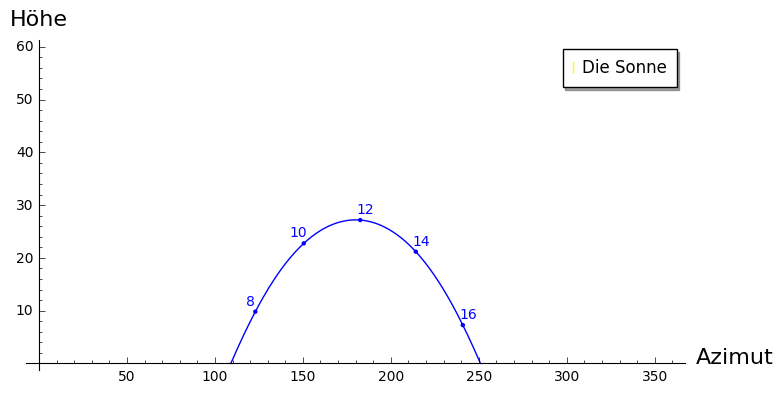

In [83]:
G.show()

In [77]:
SH=(Sonnenhoehe.subs({    
    LZ:LZ*Stunden
    ,Laengengrad:l
    ,Breitengrad:b
    ,Zeitzone:ZZ
})/Grad).function(LZ)

ErsterTag = 1
Tage = 365
Sonnenstunden = 0
Luftmasse = 0
# Formel aus der Vorlesung
LM = (1 / sin(SH*Grad)).factor()
# Alternative Formel
LM = (1 / (cos((90 - SH) * Grad) + 0.50572 * (6.07995 + SH)**(-1.6364))).factor()
#print LM
Delta = 0.01
for Heute in srange(ErsterTag,ErsterTag + Tage,1):
    Sonnenaufgang = find_root(SH(TagDesJahres=Heute),0,12)
    Sonnenuntergang = find_root(SH(TagDesJahres=Heute),12,24)
    Sonnenstunden += float(Sonnenuntergang - Sonnenaufgang - 2 * Delta)
    Luftmasse += \
        numerical_integral(LM(TagDesJahres=Heute),Sonnenaufgang + Delta,Sonnenuntergang - Delta)[0] \
        / float(Sonnenuntergang - Sonnenaufgang - 2 * Delta)

In Deutschland wird von einer Sonnenscheindauer von $1000$ Stunden pro Jahr ausgegangen.

In [78]:
print 'An diesem Ort gibt es {:.0f} Stunden Tageslicht im Jahr.'.format(Sonnenstunden)
print 'Die mittlere tägliche Sonnenscheindauer beträgt {:.2f} Stunden.'.format(Sonnenstunden / Tage)
print 'Die mittlere Luftmasse beträgt {:.2f}.'.format(Luftmasse / Tage) 

An diesem Ort gibt es 4398 Stunden Tageslicht im Jahr.
Die mittlere tägliche Sonnenscheindauer beträgt 12.05 Stunden.
Die mittlere Luftmasse beträgt 4.88.


Um auf die Sonnenscheindauer zu kommen, wird die gleiche Auswertung für die Mittagsstunden wiederholt.

In [79]:
SH=(Sonnenhoehe.subs({    
    LZ:LZ*Stunden
    ,Laengengrad:l
    ,Breitengrad:b
    ,Zeitzone:ZZ
})/Grad).function(LZ)

ErsterTag = 1
Tage = 365
Sonnenstunden = 0
Luftmasse = 0
# Formel aus der Vorlesung
LM = (1 / sin(SH*Grad)).factor()
# Alternative Formel
LM = (1 / (cos((90 - SH) * Grad) + 0.50572 * (6.07995 + SH)**(-1.6364))).factor()
#print LM
Delta = 0.01
for Heute in srange(ErsterTag,ErsterTag + Tage,1):
    Sonnenaufgang = find_root(SH(TagDesJahres=Heute),0,12)
    Sonnenuntergang = find_root(SH(TagDesJahres=Heute),12,24)
    Mittag = find_root(SH(TagDesJahres=Heute).diff(LZ),Sonnenaufgang,Sonnenuntergang)
    Mittagsstunden = (Sonnenuntergang - Sonnenaufgang) / 4
    Anfangszeit = Mittag - Mittagsstunden / 2
    Endzeit = Mittag + Mittagsstunden / 2
    Sonnenstunden += float(Mittagsstunden)
    Luftmasse += \
        numerical_integral(LM(TagDesJahres=Heute),Anfangszeit,Endzeit)[0] \
        / float(Mittagsstunden)

In [80]:
print 'An diesem Ort gibt es {:.0f} Stunden Sonnenschein im Jahr.'.format(Sonnenstunden)
print 'Die mittlere tägliche Sonnenscheindauer beträgt {:.2f} Stunden.'.format(Sonnenstunden / Tage)
print 'Die mittlere Luftmasse beträgt {:.2f}.'.format(Luftmasse / Tage) 

An diesem Ort gibt es 1101 Stunden Sonnenschein im Jahr.
Die mittlere tägliche Sonnenscheindauer beträgt 3.02 Stunden.
Die mittlere Luftmasse beträgt 1.97.


In [85]:
Heute = 1 #364/2
Sonnenaufgang = find_root(SH(TagDesJahres=Heute),0,12)
Sonnenuntergang = find_root(SH(TagDesJahres=Heute),12,24)
Mittag = find_root(SH(TagDesJahres=Heute).diff(LZ),Sonnenaufgang,Sonnenuntergang)
LM = (1 / (cos((90 - SH) * Grad) + 0.50572 * (6.07995 + SH)**(-1.6364))).factor()
LM = LM(TagDesJahres = Heute).factor()
print '----------------------'
print 'Zeit\t LM\t SH'
print 'in h\t -\t in °'
print '---------------------'
for Zeit in srange(Sonnenaufgang+0.1,Sonnenuntergang):
    print '{:4.1f}\t{:4.1f}\t{:4.1f}'.format(float(Zeit), float(LM(LZ=Zeit)), float(SH(TagDesJahres=Heute,LZ=Zeit)))
print '---------------------'

----------------------
Zeit	 LM	 SH
in h	 -	 in °
---------------------
 8.4	28.8	 0.7
 9.4	 7.4	 7.3
10.4	 4.6	12.3
11.4	 3.7	15.3
12.4	 3.6	16.0
13.4	 4.0	14.3
14.4	 5.3	10.5
15.4	10.7	 4.8
---------------------


----
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    <!-- $('nav#menubar').hide(); -->
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>